In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from iminuit import Minuit   
from scipy import stats
from scipy.stats import linregress
import sys
import pandas as pd

sys.path.append(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\AppStats\AppStat2023\External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax

## Read file 2024bic

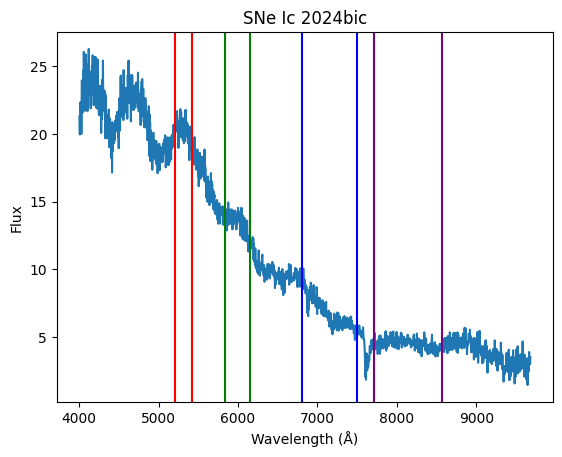

In [82]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024bic\2024bic-ALFOSC-2024-02-03.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_bic = f.wave
flux_bic = f.flux
fluxerr_bic = f.fluxerr
plt.plot(wave_bic, flux_bic)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2024bic')

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024bic.pdf', dpi=200)
plt.axvline(wave_bic[370], c='r')
plt.axvline(wave_bic[430], c='r')
plt.axvline(wave_bic[550], c='g')
plt.axvline(wave_bic[640], c='g')
plt.axvline(wave_bic[820], c='b')
plt.axvline(wave_bic[1010], c='b')
plt.axvline(wave_bic[1070], c='purple')
plt.axvline(wave_bic[1300], c='purple')

### Fit black body 

In [33]:
x_bic=wave_bic
y_bic=flux_bic*1.e-17
sy_bic = fluxerr_bic*1.e-17

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_bic)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_bic,t_bic):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_bic**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_bic * 1.381e-23 * t_bic)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_bic, y_bic, sy_bic) 
minuit = Minuit(chi2_object, t_bic=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.494                      │              Nfcn = 40               │
│ EDM = 1.95e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_bic │   9.4e3   │   0.5e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    t_bic │
├───────┼──────────┤
│ t_bic │ 2.92e+05 │
└───────┴──────────┘

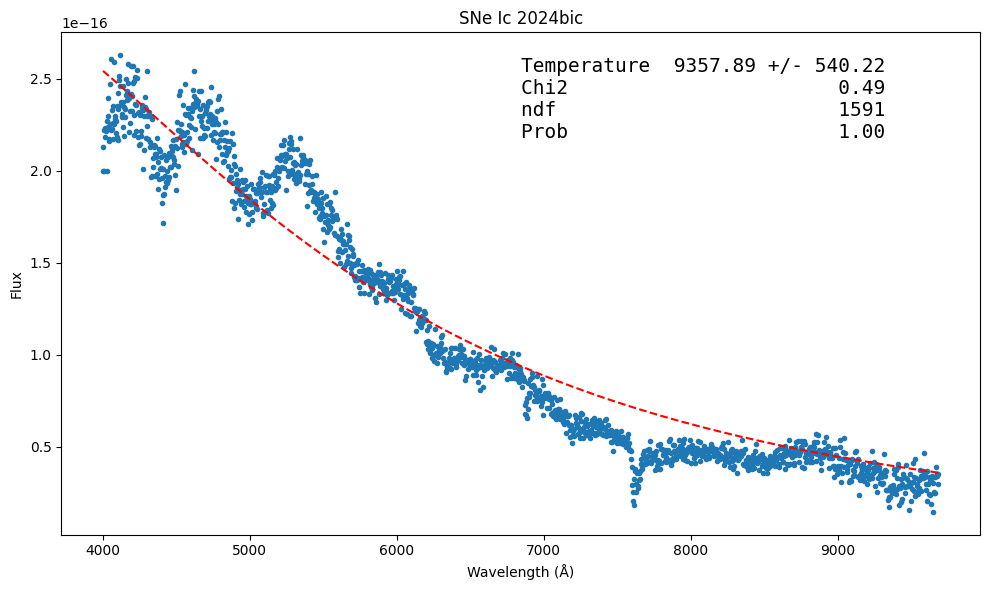

In [34]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_bic = minuit.values['t_bic']
sigma_temp_fit_bic = minuit.errors['t_bic']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_bic, y_bic, marker='.')
ax.plot(x_bic, fit_function(x_bic, *minuit.values), '--r')
plt.title('SNe Ic 2024bic')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_bic, sigma_temp_fit_bic],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024bic_fit.pdf', dpi=200)

Text(0.5, 1.0, 'SNe Ic 2024bic')

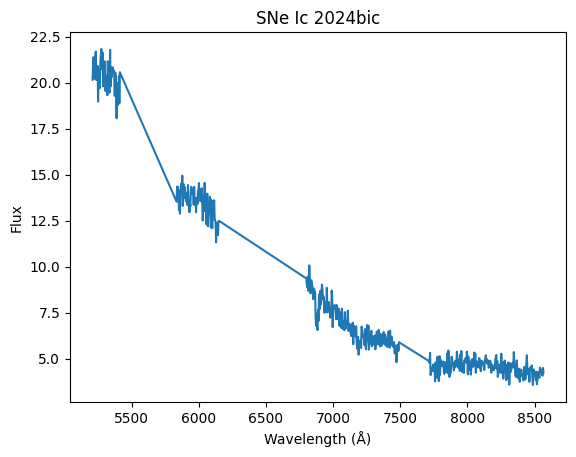

In [71]:
f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_bic_crop = f.wave.iloc[np.concatenate((np.arange(370, 430), np.arange(550, 640), np.arange(820,1010), np.arange(1070, 1300)))]
flux_bic_crop = f.flux.iloc[np.concatenate((np.arange(370, 430), np.arange(550, 640), np.arange(820,1010), np.arange(1070, 1300)))]
fluxerr_bic_crop = f.fluxerr.iloc[np.concatenate((np.arange(370, 430), np.arange(550, 640), np.arange(820,1010), np.arange(1070, 1300)))]
plt.plot(wave_bic_crop, flux_bic_crop)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2024bic')

In [78]:
x_bic_crop=wave_bic_crop
y_bic_crop=flux_bic_crop*1.e-16
sy_bic_crop = fluxerr_bic_crop*1.e-16

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_bic_crop)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_bic,t_bic):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_bic**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_bic * 1.381e-23 * t_bic)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_bic_crop, y_bic_crop, sy_bic_crop) 
minuit = Minuit(chi2_object, t_bic=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.02254                    │              Nfcn = 55               │
│ EDM = 2.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_bic │   31e3    │    9e3    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────┐
│       │   t_bic │
├───────┼─────────┤
│ t_bic │ 8.3e+07 │
└───────┴─────────┘

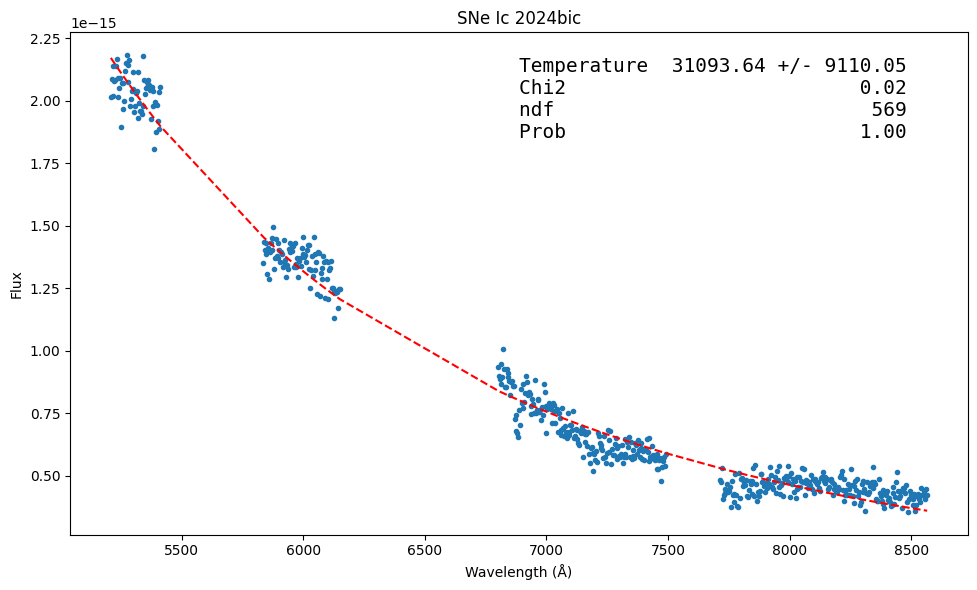

In [79]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_bic = minuit.values['t_bic']
sigma_temp_fit_bic = minuit.errors['t_bic']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_bic_crop, y_bic_crop, marker='.')
ax.plot(x_bic_crop, fit_function(x_bic_crop, *minuit.values), '--r')
plt.title('SNe Ic 2024bic')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_bic, sigma_temp_fit_bic],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024bic_fit.pdf', dpi=200)

## Read file 2024eca

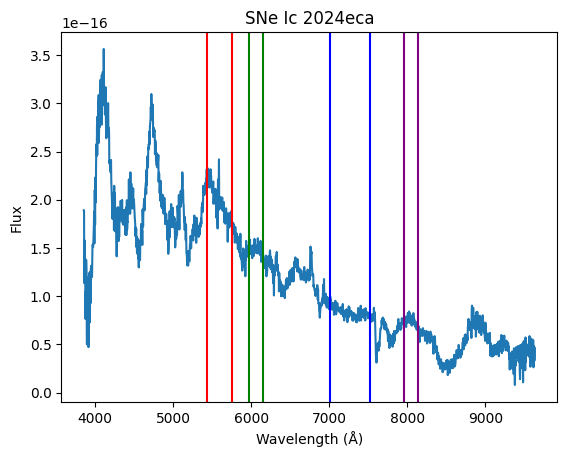

In [177]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca\2024eca-ALFOSC-2024-03-18.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eca = f.wave
flux_eca = f.flux*1.e-17
fluxerr_eca = f.fluxerr*1.e-17
plt.plot(wave_eca, flux_eca)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2024eca')

plt.axvline(wave_eca[450], c='r')
plt.axvline(wave_eca[540], c='r')
plt.axvline(wave_eca[600], c='g')
plt.axvline(wave_eca[650], c='g')
plt.axvline(wave_eca[890], c='b')
plt.axvline(wave_eca[1030], c='b')
plt.axvline(wave_eca[1150], c='purple')
plt.axvline(wave_eca[1200], c='purple')
# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca.pdf', dpi=200)

### Fit black body 

In [178]:
x_eca=wave_eca
y_eca=flux_eca
sy_eca = fluxerr_eca

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_eca)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_eca,t_eca):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_eca**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_eca * 1.381e-23 * t_eca)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_eca, y_eca, sy_eca) 
minuit = Minuit(chi2_object, t_eca=5000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.027                      │              Nfcn = 37               │
│ EDM = 2.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_eca │   9.3e3   │   0.5e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    t_eca │
├───────┼──────────┤
│ t_eca │ 2.69e+05 │
└───────┴──────────┘

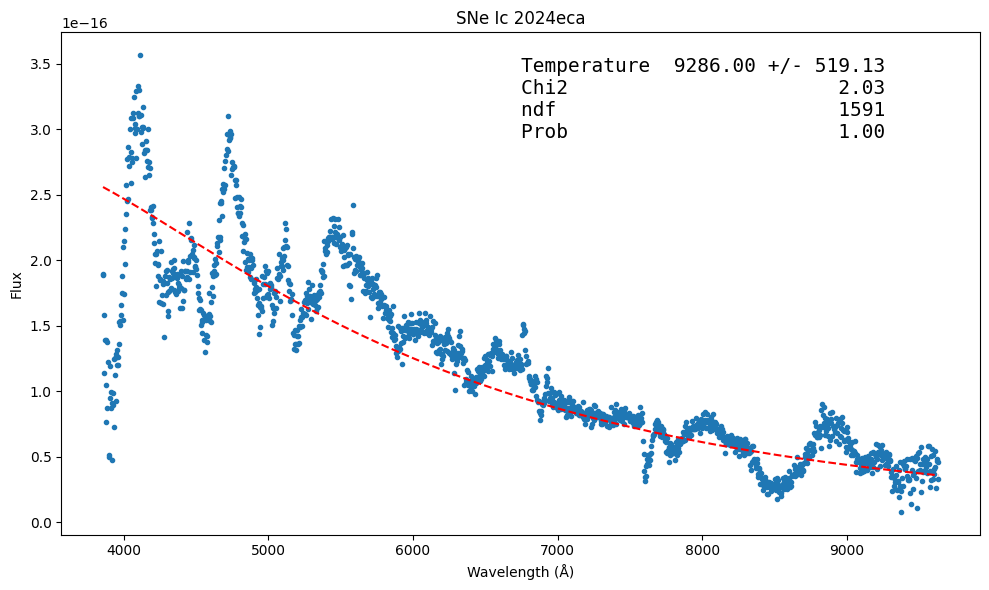

In [179]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_eca = minuit.values['t_eca']
sigma_temp_fit_eca = minuit.errors['t_eca']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_eca, y_eca, marker='.')
ax.plot(x_eca, fit_function(x_eca, *minuit.values), '--r')
plt.title('SNe Ic 2024eca')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_eca, sigma_temp_fit_eca],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca_fit.pdf', dpi=200)

Text(0.5, 1.0, 'SNe Ic 2024eca')

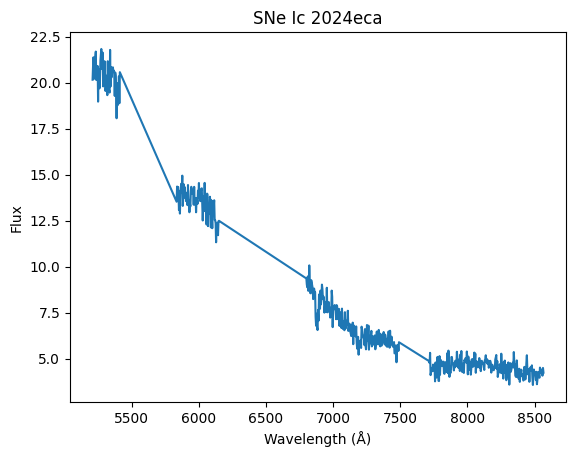

In [182]:
f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eca_crop = f.wave.iloc[np.concatenate((np.arange(450, 540), np.arange(600, 650), np.arange(890,1030), np.arange(1150, 1200)))]
flux_eca_crop = f.flux.iloc[np.concatenate((np.arange(450, 540), np.arange(600, 650), np.arange(890,1030), np.arange(1150, 1200)))]
fluxerr_eca_crop = f.fluxerr.iloc[np.concatenate((np.arange(450, 540), np.arange(600, 650), np.arange(890,1030), np.arange(1150, 1200)))]
plt.plot(wave_bic_crop, flux_bic_crop)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2024eca')

In [187]:
x_eca_crop=wave_eca_crop
y_eca_crop=flux_eca_crop*1.e-16
sy_eca_crop = fluxerr_eca_crop*1.e-16

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_eca_crop)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_eca_crop,t_eca_crop):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_eca_crop**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_eca_crop * 1.381e-23 * t_eca_crop)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_eca_crop, y_eca_crop, sy_eca_crop) 
minuit = Minuit(chi2_object, t_eca_crop=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.04405                    │              Nfcn = 59               │
│ EDM = 3.63e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_eca_crop │  0.035e6  │  0.010e6  │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬────────────┐
│            │ t_eca_crop │
├────────────┼────────────┤
│ t_eca_crop │   1.08e+08 │
└────────────┴────────────┘

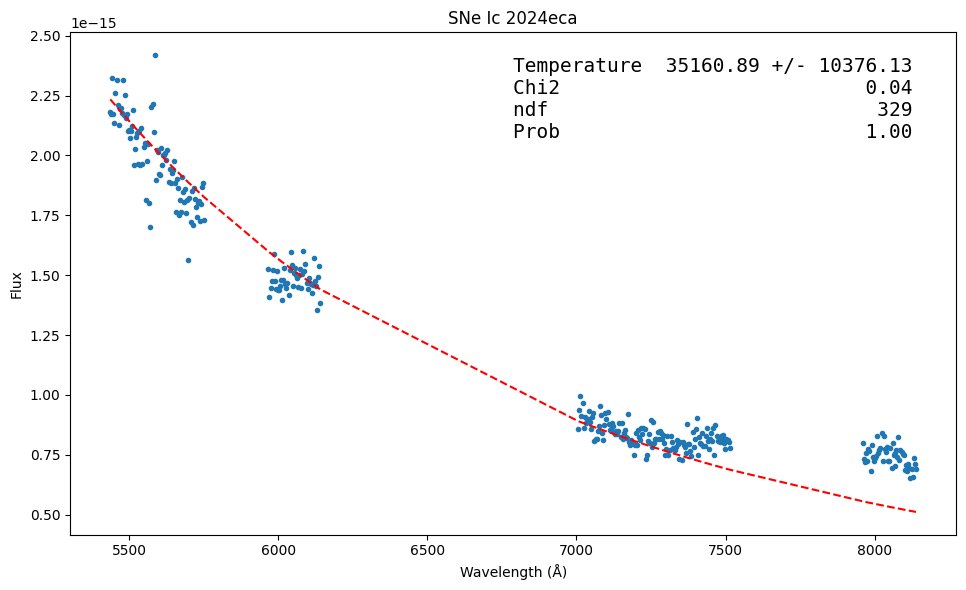

In [188]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_eca_crop = minuit.values['t_eca_crop']
sigma_temp_fit_eca_crop = minuit.errors['t_eca_crop']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_eca_crop, y_eca_crop, marker='.')
ax.plot(x_eca_crop, fit_function(x_eca_crop, *minuit.values), '--r')
plt.title('SNe Ic 2024eca')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_eca_crop, sigma_temp_fit_eca_crop],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca_fit.pdf', dpi=200)

## Read file 2024ajy

Text(0.5, 1.0, 'SNe Ic 2024ajy')

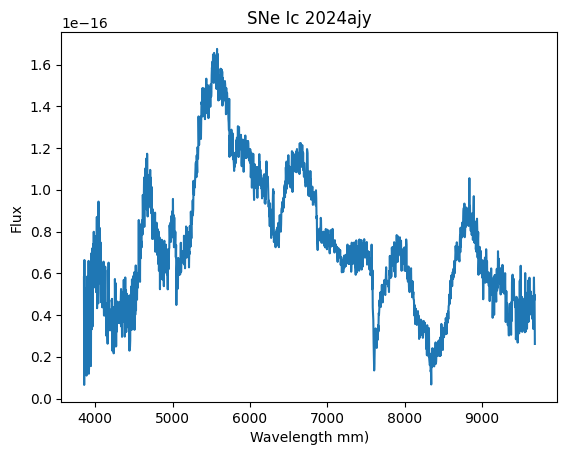

In [11]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy\2024ajy-ALFOSC-2024-02-01.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_ajy = f.wave
flux_ajy = f.flux*1.e-17
fluxerr_ajy = f.fluxerr*1.e-17
plt.plot(wave_ajy, flux_ajy)
plt.xlabel('Wavelength mm)')
plt.ylabel('Flux')
plt.title('SNe Ic 2024ajy')

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy.pdf', dpi=200)

### Fit black body

In [12]:
x_ajy=wave_ajy
y_ajy=flux_ajy
sy_ajy = fluxerr_ajy

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_ajy)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_ajy,t_ajy):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_ajy**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_ajy * 1.381e-23 * t_ajy)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_ajy, y_ajy, sy_ajy) 
minuit = Minuit(chi2_object, t_ajy=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.59                       │              Nfcn = 50               │
│ EDM = 1.36e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_ajy │   7.6e3   │   0.7e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    t_ajy │
├───────┼──────────┤
│ t_ajy │ 5.02e+05 │
└───────┴──────────┘

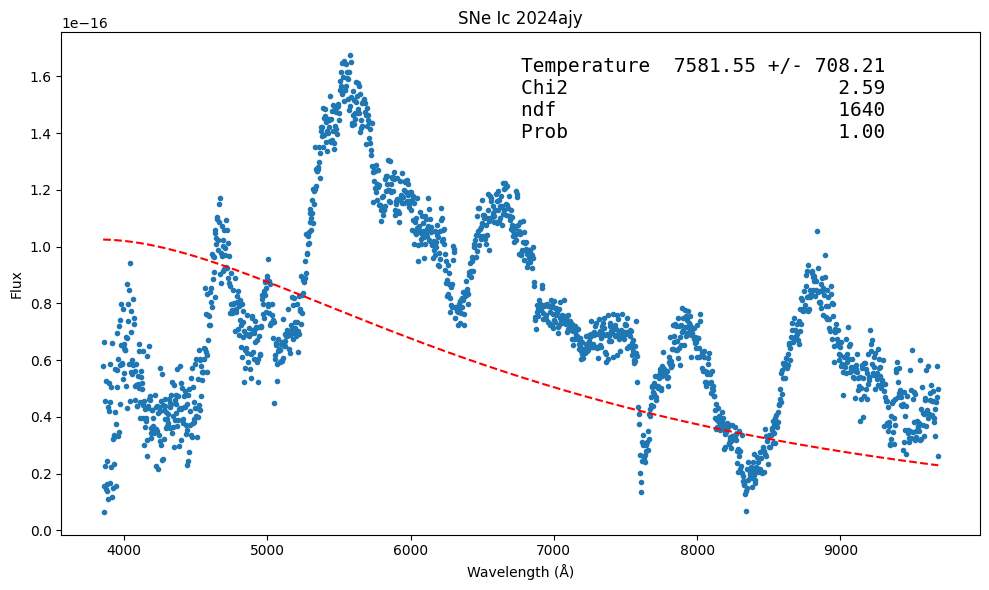

In [13]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_ajy = minuit.values['t_ajy']
sigma_temp_fit_ajy = minuit.errors['t_ajy']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_ajy, y_ajy, marker='.')
ax.plot(x_ajy, fit_function(x_ajy, *minuit.values), '--r')

plt.title('SNe Ic 2024ajy')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_ajy, sigma_temp_fit_ajy],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

## File 2023wtm

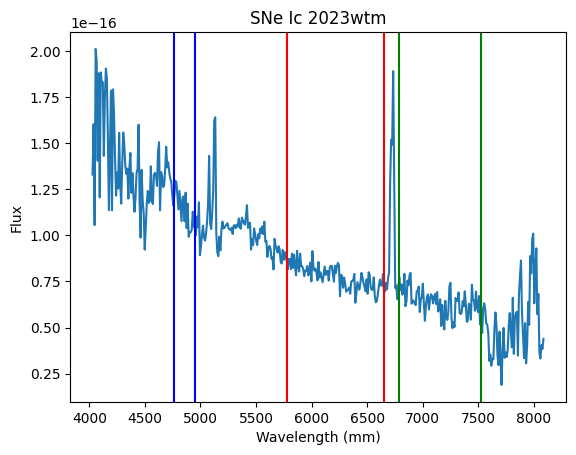

In [206]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023wtm\2023wtm-SPRAT-2023-11-16.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_wtm = f.wave
flux_wtm = f.flux*1.e-16
fluxerr_wtm = f.fluxerr*1.e-16
plt.plot(wave_wtm, flux_wtm)
plt.xlabel('Wavelength (mm)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023wtm')

plt.axvline(wave_wtm[80], c='b')
plt.axvline(wave_wtm[100], c='b')
plt.axvline(wave_wtm[190], c='r')
plt.axvline(wave_wtm[285], c='r')
plt.axvline(wave_wtm[300], c='g')
plt.axvline(wave_wtm[380], c='g')

In [190]:
x_wtm=wave_wtm
y_wtm=flux_wtm
sy_wtm = fluxerr_wtm

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_wtm)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_wtm,t_wtm):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_wtm**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_wtm * 1.381e-23 * t_wtm)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_wtm, y_wtm, sy_wtm) 
minuit = Minuit(chi2_object, t_wtm=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.001222                   │              Nfcn = 37               │
│ EDM = 1.79e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_wtm │  0.008e6  │  0.011e6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    t_wtm │
├───────┼──────────┤
│ t_wtm │ 1.15e+08 │
└───────┴──────────┘

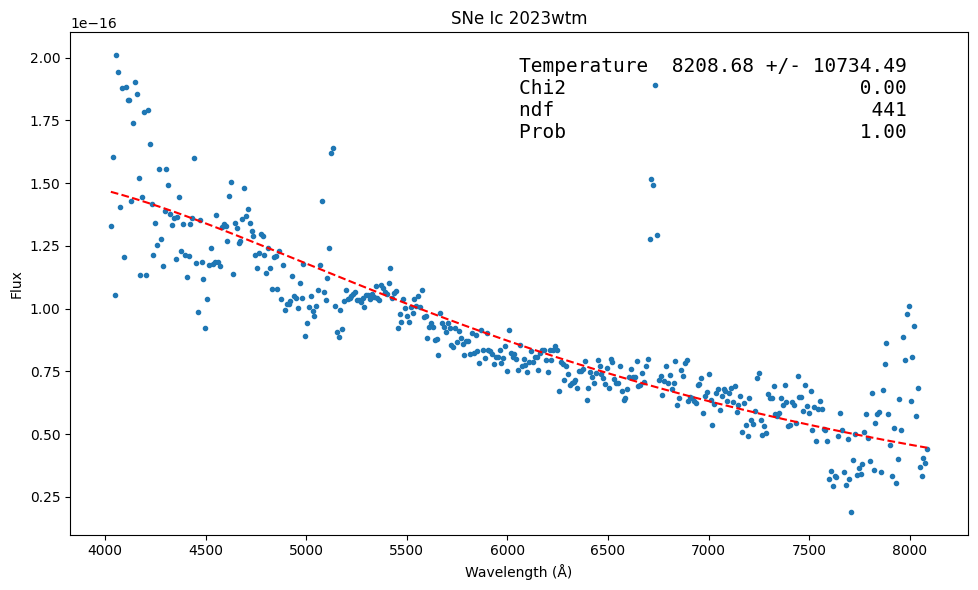

In [191]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_wtm = minuit.values['t_wtm']
sigma_temp_fit_wtm = minuit.errors['t_wtm']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_wtm, y_wtm, marker='.')
ax.plot(x_wtm, fit_function(x_wtm, *minuit.values), '--r')

plt.title('SNe Ic 2023wtm')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_wtm, sigma_temp_fit_wtm],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

Text(0.5, 1.0, 'SNe Ic 2023wtm')

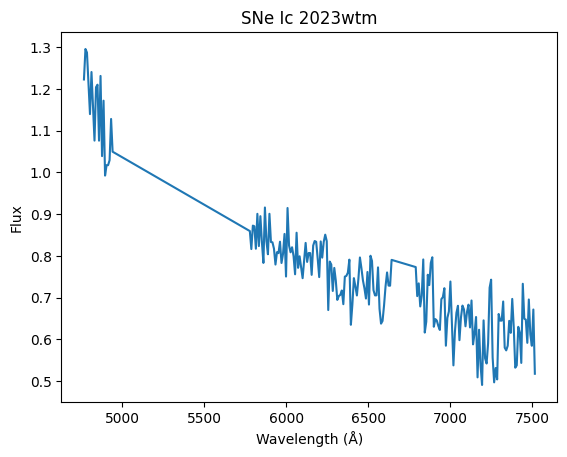

In [208]:
f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_wtm_crop = f.wave.iloc[np.concatenate((np.arange(80,100), np.arange(190, 285), np.arange(300,380)))]
flux_wtm_crop = f.flux.iloc[np.concatenate((np.arange(80,100), np.arange(190, 285), np.arange(300,380)))]
fluxerr_wtm_crop = f.fluxerr.iloc[np.concatenate((np.arange(80,100), np.arange(190, 285), np.arange(300,380)))]
plt.plot(wave_wtm_crop, flux_wtm_crop)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023wtm')

In [229]:
x_wtm_crop=wave_wtm_crop
y_wtm_crop=flux_wtm_crop*1.e-16
sy_wtm_crop = fluxerr_wtm_crop*1.e-16

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_wtm_crop)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_wtm_crop,t_wtm_crop):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_wtm_crop**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_wtm_crop * 1.381e-23 * t_wtm_crop)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_wtm_crop, y_wtm_crop, sy_wtm_crop) 
minuit = Minuit(chi2_object, t_wtm_crop=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.76e-05                   │              Nfcn = 37               │
│ EDM = 4.01e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_wtm_crop │  0.008e6  │  0.022e6  │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬────────────┐
│            │ t_wtm_crop │
├────────────┼────────────┤
│ t_wtm_crop │   5.01e+08 │
└────────────┴────────────┘

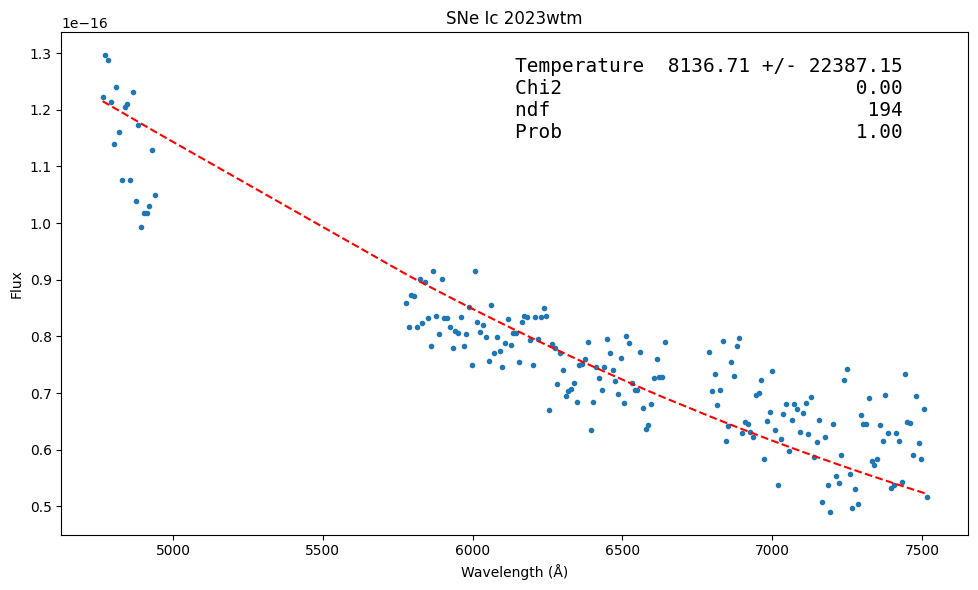

In [230]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_wtm_crop = minuit.values['t_wtm_crop']
sigma_temp_fit_wtm_crop = minuit.errors['t_wtm_crop']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_wtm_crop, y_wtm_crop, marker='.')
ax.plot(x_wtm_crop, fit_function(x_wtm_crop, *minuit.values), '--r')

plt.title('SNe Ic 2023wtm')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_wtm_crop, sigma_temp_fit_wtm_crop],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

## File 2023eeb

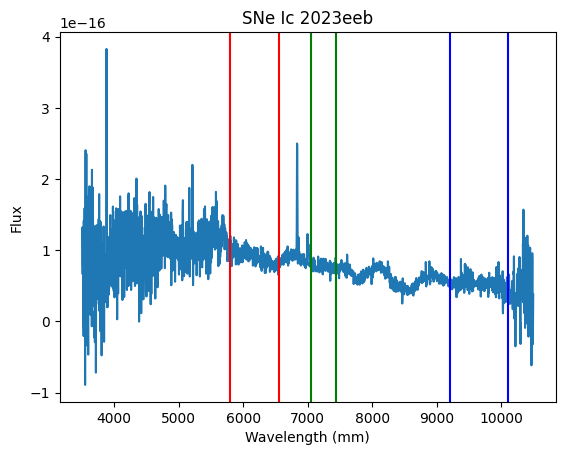

In [221]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023eeb\2023eeb-KAST-2023-04-12.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eeb = f.wave
flux_eeb = f.flux*1.e-15
fluxerr_eeb = f.fluxerr*1.e-15
plt.plot(wave_eeb, flux_eeb)
plt.xlabel('Wavelength (mm)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023eeb')

plt.axvline(wave_eeb[900], c='r')
plt.axvline(wave_eeb[1200], c='r')
plt.axvline(wave_eeb[1400], c='g')
plt.axvline(wave_eeb[1550], c='g')
plt.axvline(wave_eeb[2250], c='b')
plt.axvline(wave_eeb[2600], c='b')

In [21]:
x_eeb=wave_eeb[850:2600]
y_eeb=flux_eeb[850:2600]
sy_eeb = fluxerr_eeb[850:2600]

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_eeb)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_eeb,t_eeb):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_eeb**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_eeb * 1.381e-23 * t_eeb)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_eeb, y_eeb, sy_eeb) 
minuit = Minuit(chi2_object, t_eeb=4000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.295e-05                  │              Nfcn = 35               │
│ EDM = 1.19e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_eeb │  0.01e6   │  0.11e6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    t_eeb │
├───────┼──────────┤
│ t_eeb │ 1.27e+10 │
└───────┴──────────┘

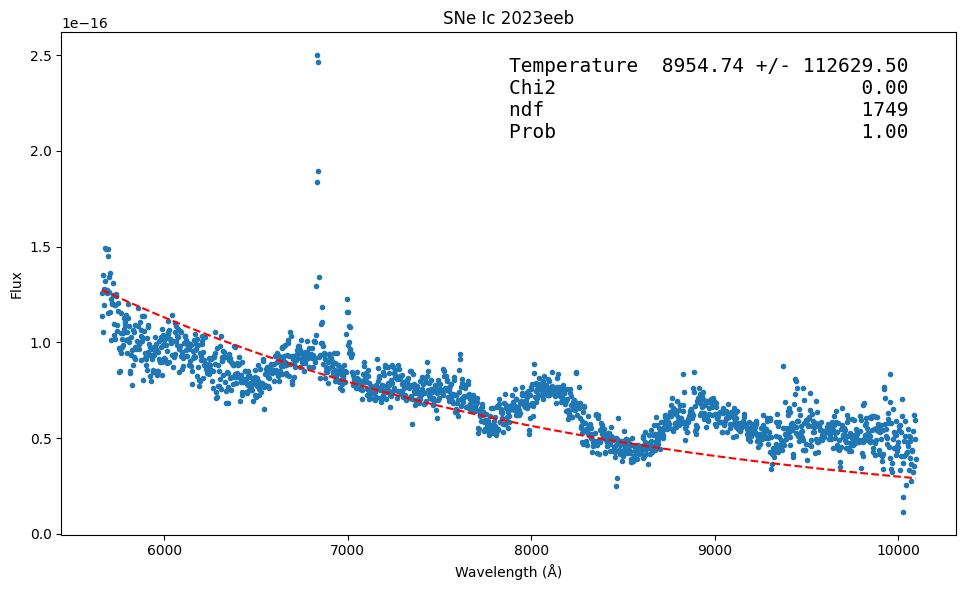

In [22]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_eeb = minuit.values['t_eeb']
sigma_temp_fit_eeb = minuit.errors['t_eeb']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_eeb, y_eeb, marker='.')
ax.plot(x_eeb, fit_function(x_eeb, *minuit.values), '--r')

plt.title('SNe Ic 2023eeb')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_eeb, sigma_temp_fit_eeb],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

Text(0.5, 1.0, 'SNe Ic 2023eeb')

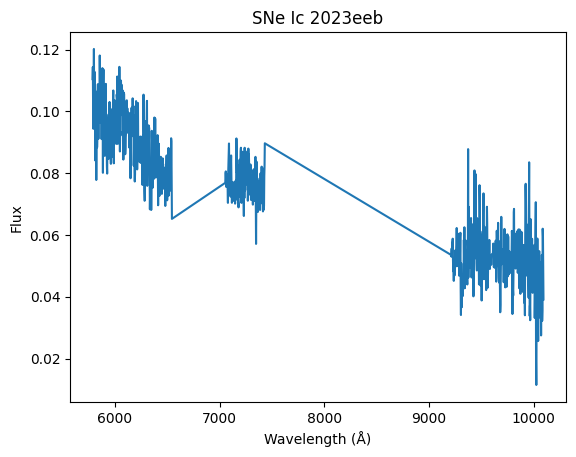

In [232]:
f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eeb_crop = f.wave.iloc[np.concatenate((np.arange(900, 1200), np.arange(1400,1550), np.arange(2250,2600)))]
flux_eeb_crop = f.flux.iloc[np.concatenate((np.arange(900, 1200), np.arange(1400,1550), np.arange(2250,2600)))]
fluxerr_eeb_crop = f.fluxerr.iloc[np.concatenate((np.arange(900, 1200), np.arange(1400,1550), np.arange(2250,2600)))]
plt.plot(wave_eeb_crop, flux_eeb_crop)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023eeb')

In [247]:
x_eeb_crop=wave_eeb_crop
y_eeb_crop=flux_eeb_crop*1.e-14
sy_eeb_crop = fluxerr_eeb_crop*1.e-14

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_eeb_crop)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_eeb_crop,t_eeb_crop):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_eeb_crop**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_eeb_crop * 1.381e-23 * t_eeb_crop)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_eeb_crop, y_eeb_crop, sy_eeb_crop) 
minuit = Minuit(chi2_object, t_eeb_crop=4000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.317e-05                  │              Nfcn = 53               │
│ EDM = 3.18e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_eeb_crop │    0e6    │    1e6    │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬────────────┐
│            │ t_eeb_crop │
├────────────┼────────────┤
│ t_eeb_crop │   9.11e+11 │
└────────────┴────────────┘

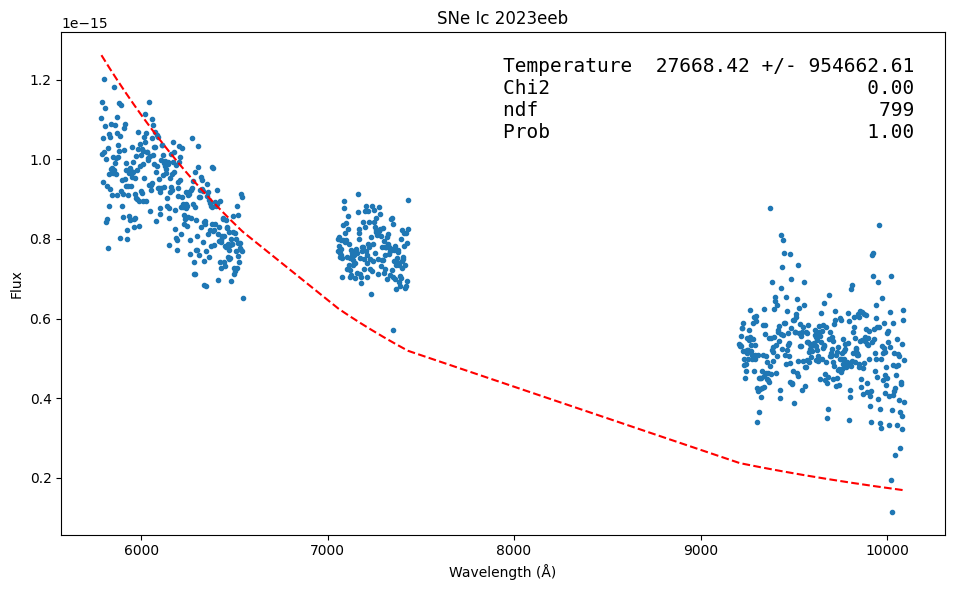

In [248]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_eeb_crop = minuit.values['t_eeb_crop']
sigma_temp_fit_eeb_crop = minuit.errors['t_eeb_crop']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_eeb_crop, y_eeb_crop, marker='.')
ax.plot(x_eeb_crop, fit_function(x_eeb_crop, *minuit.values), '--r')

plt.title('SNe Ic 2023eeb')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_eeb_crop, sigma_temp_fit_eeb_crop],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

## 2023apg

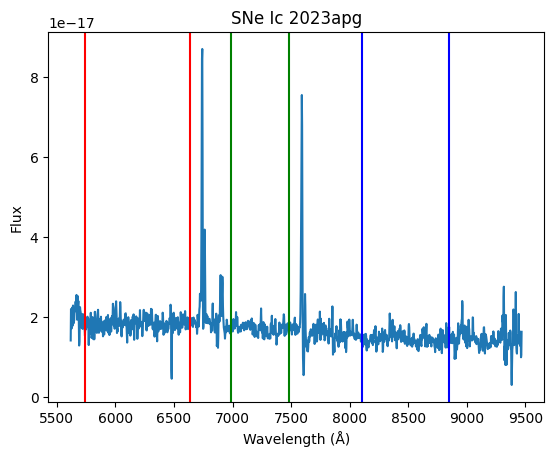

In [249]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023apg\2023apg-KAST-2023-08-26.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_apg = f.wave[950:2500]
flux_apg = f.flux[950:2500]*1.e-15
fluxerr_apg = f.fluxerr[950:2500]*1.e-15
plt.plot(wave_apg, flux_apg)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023apg')

plt.axvline(wave_apg[1000], c='r')
plt.axvline(wave_apg[1360], c='r')
plt.axvline(wave_apg[1500], c='g')
plt.axvline(wave_apg[1700], c='g')
plt.axvline(wave_apg[1950], c='b')
plt.axvline(wave_apg[2250], c='b')

In [27]:
x_apg=wave_apg
y_apg=flux_apg
sy_apg = fluxerr_apg

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_apg)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_apg,t_apg):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_apg**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_apg * 1.381e-23 * t_apg)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_apg, y_apg, sy_apg) 
minuit = Minuit(chi2_object, t_apg=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2153                       │              Nfcn = 39               │
│ EDM = 1.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_apg │  5.591e3  │  0.007e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────┐
│       │ t_apg │
├───────┼───────┤
│ t_apg │  55.6 │
└───────┴───────┘

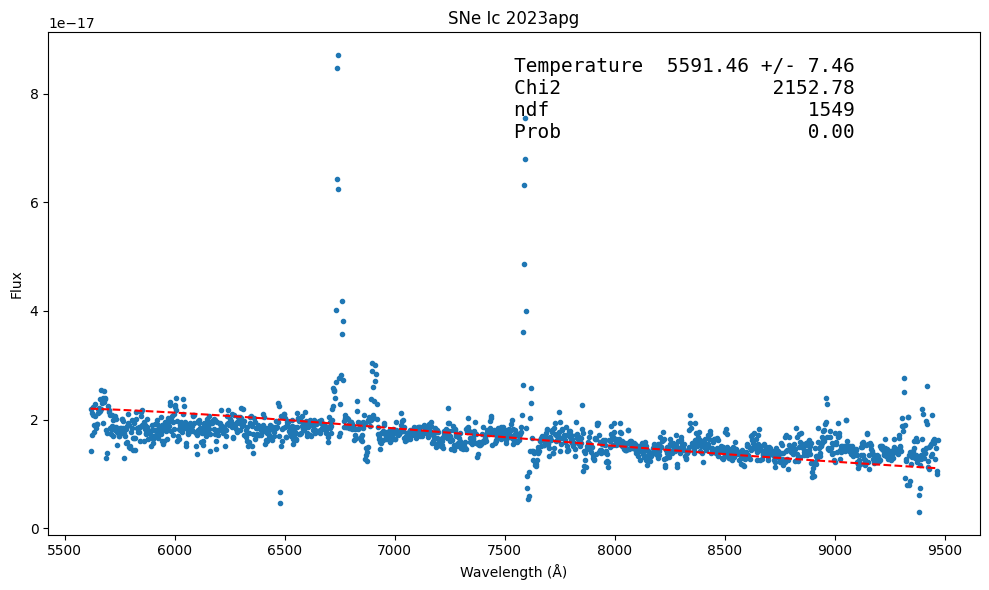

In [28]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_apg = minuit.values['t_apg']
sigma_temp_fit_apg = minuit.errors['t_apg']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_apg, y_apg, marker='.')
ax.plot(x_apg, fit_function(x_apg, *minuit.values), '--r')

plt.title('SNe Ic 2023apg')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_apg, sigma_temp_fit_apg],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

Text(0.5, 1.0, 'SNe Ic 2023apg')

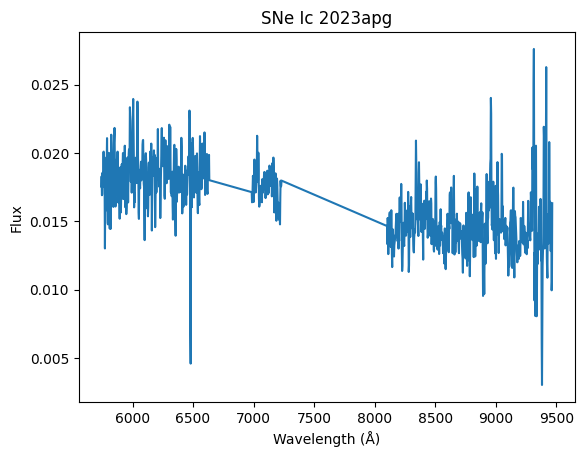

In [250]:
f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_apg_crop = f.wave.iloc[np.concatenate((np.arange(1000, 1360), np.arange(1500,1600), np.arange(1950,2500)))]
flux_apg_crop = f.flux.iloc[np.concatenate((np.arange(1000, 1360), np.arange(1500,1600), np.arange(1950,2500)))]
fluxerr_apg_crop = f.fluxerr.iloc[np.concatenate((np.arange(1000, 1360), np.arange(1500,1600), np.arange(1950,2500)))]
plt.plot(wave_apg_crop, flux_apg_crop)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023apg')

In [259]:
x_apg_crop=wave_apg_crop
y_apg_crop=flux_apg_crop*1.e-15
sy_apg_crop = fluxerr_apg_crop*1.e-15

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_apg_crop)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_apg_crop,t_apg_crop):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_apg_crop**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_apg_crop * 1.381e-23 * t_apg_crop)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_apg_crop, y_apg_crop, sy_apg_crop) 
minuit = Minuit(chi2_object, t_apg_crop=4000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 565                        │              Nfcn = 29               │
│ EDM = 1.03e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_apg_crop │  5.568e3  │  0.010e3  │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬────────────┐
│            │ t_apg_crop │
├────────────┼────────────┤
│ t_apg_crop │       90.5 │
└────────────┴────────────┘

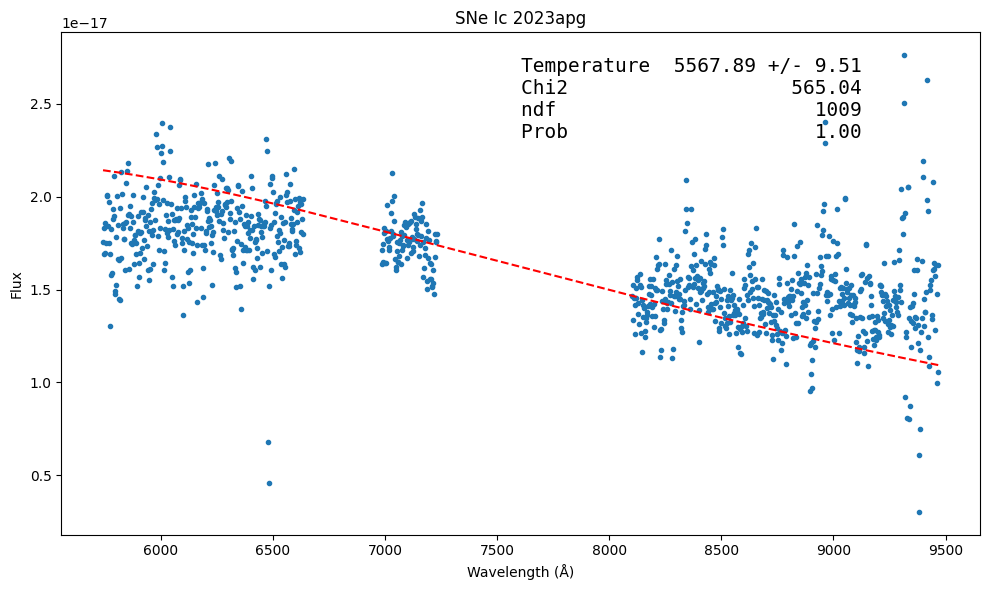

In [260]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_apg_crop = minuit.values['t_apg_crop']
sigma_temp_fit_apg_crop = minuit.errors['t_apg_crop']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_apg_crop, y_apg_crop, marker='.')
ax.plot(x_apg_crop, fit_function(x_apg_crop, *minuit.values), '--r')

plt.title('SNe Ic 2023apg')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_apg_crop, sigma_temp_fit_apg_crop],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)

## 2023

Text(0.5, 1.0, 'SNe Ic 2023acr')

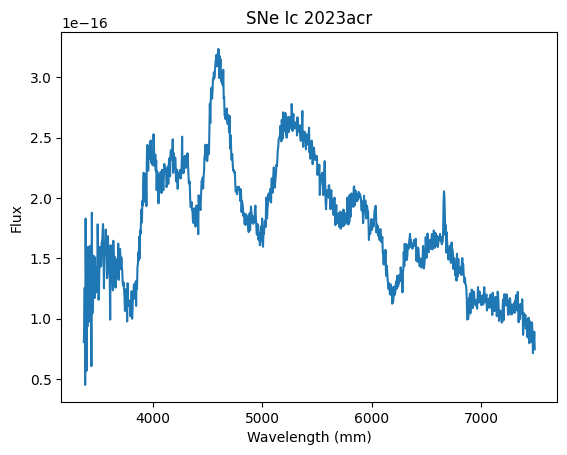

In [29]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023aaby\2023aaby-EFOSC2-NTT-2023-12-16.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_apg = f.wave
flux_apg = f.flux
fluxerr_apg = f.fluxerr
plt.plot(wave_apg, flux_apg)
plt.xlabel('Wavelength (mm)')
plt.ylabel('Flux')
plt.title('SNe Ic 2023acr')


In [30]:
x_apg=wave_apg
y_apg=flux_apg
sy_apg = fluxerr_apg

# h = 6.626e-34  # Planck's constant (Jxs)
# c = 3.0e8     # Speed of light (m/s)
# k = 1.381e-23  # Boltzmann constant (J/K)

Nvar = 1    # Number of variables 
Npoints = len(x_apg)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

# Define a fit function:
def fit_function(x_apg,t_apg):
    return (2 * 6.626e-34 * 3.0e18**2 / (x_apg**5)) * (1 / (np.exp(6.626e-34 * 3.0e18 / (x_apg * 1.381e-23 * t_apg)) - 1))

# Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
chi2_object = Chi2Regression(fit_function, x_apg, y_apg, sy_apg) 
minuit = Minuit(chi2_object, t_apg=3000)

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.552e-33                  │              Nfcn = 11               │
│ EDM = 6.08e-76 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_apg │ 3.0000e3  │ 0.0014e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────┐
│       │ t_apg │
├───────┼───────┤
│ t_apg │     2 │
└───────┴───────┘

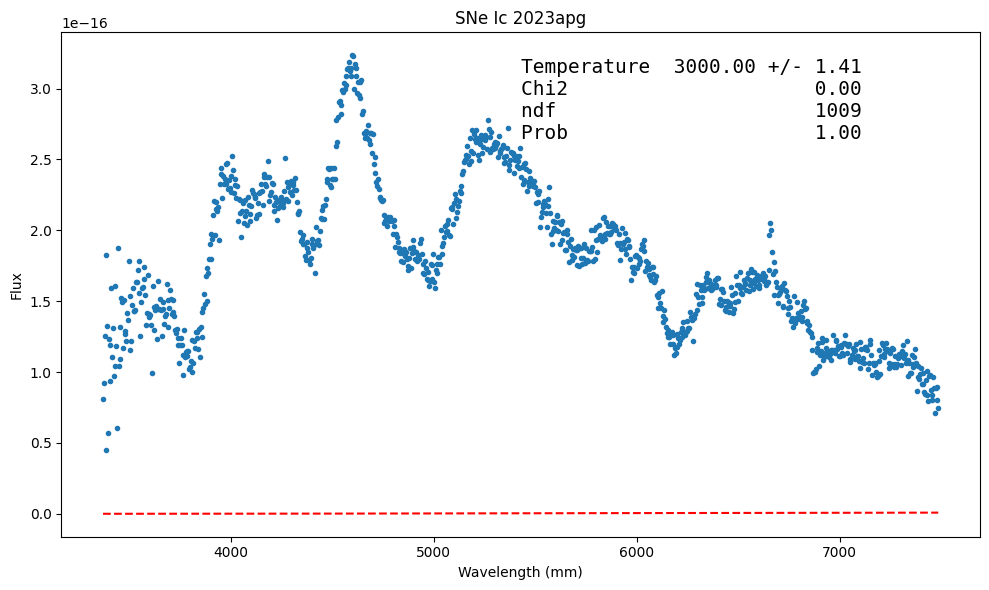

In [31]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

temp_fit_apg = minuit.values['t_apg']
sigma_temp_fit_apg = minuit.errors['t_apg']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_apg, y_apg, marker='.')
ax.plot(x_apg, fit_function(x_apg, *minuit.values), '--r')

plt.title('SNe Ic 2023apg')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Flux')

d = {
    'Temperature':   [temp_fit_apg, sigma_temp_fit_apg],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy_fit.pdf', dpi=200)